In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Load insurance data
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_data.shape

(1338, 7)

In [4]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\user.LAPTOP\AppData\Local\Temp\ipykernel_4752\2200333412.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data.age)


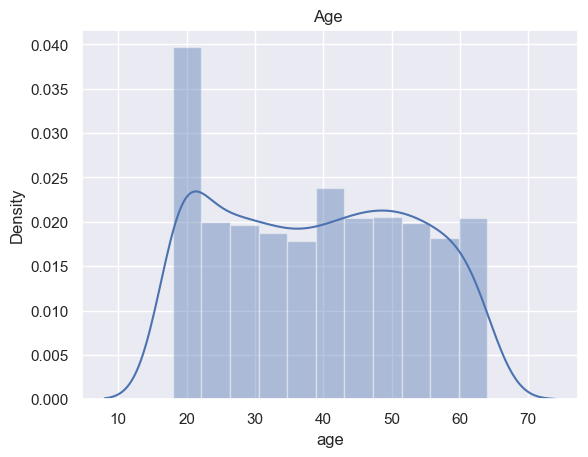

In [14]:
# check the age distribution
sns.set()
sns.distplot(insurance_data.age)
plt.title('Age ')
plt.show()

male      676
female    662
Name: sex, dtype: int64


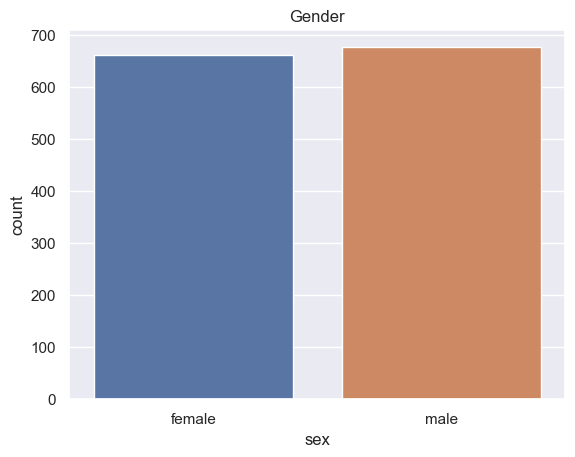

In [18]:
# Gender columns
print(insurance_data.sex.value_counts())
sns.countplot(x=insurance_data.sex, data=insurance_data)
plt.title('Gender')
plt.show()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


C:\Users\user.LAPTOP\AppData\Local\Temp\ipykernel_4752\1237113182.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data.bmi)


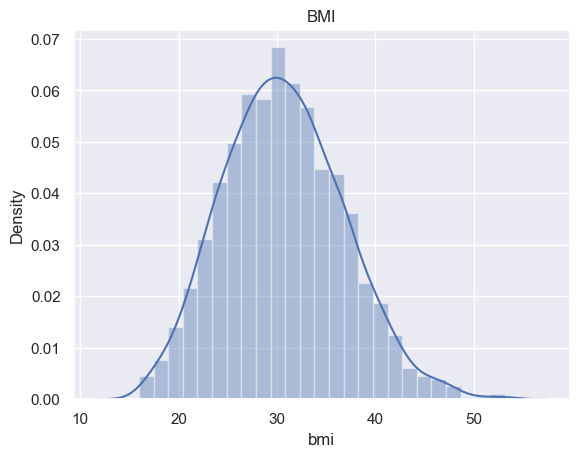

In [20]:
# check the BMI Distribution
print(insurance_data.bmi.value_counts())
sns.distplot(insurance_data.bmi)
plt.title('BMI')
plt.show()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


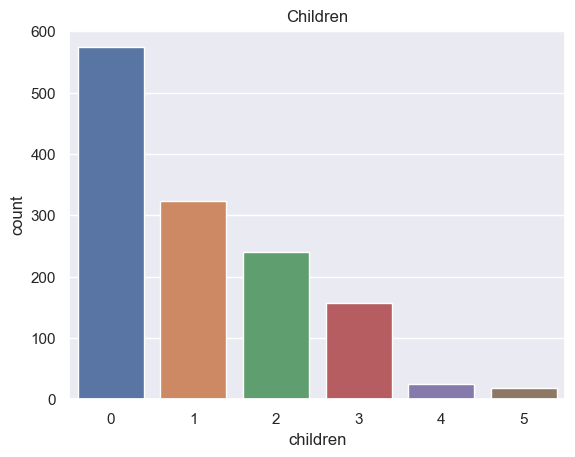

In [22]:
# childred columns
print(insurance_data.children.value_counts())
sns.countplot(x=insurance_data.children, data=insurance_data)
plt.title('Children')
plt.show()

no     1064
yes     274
Name: smoker, dtype: int64


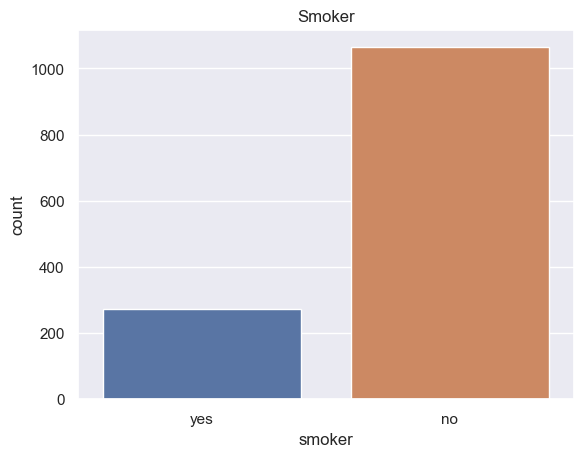

In [25]:
# smoker columns
print(insurance_data.smoker.value_counts())
sns.countplot(x=insurance_data.smoker, data=insurance_data)
plt.title('Smoker')
plt.show()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


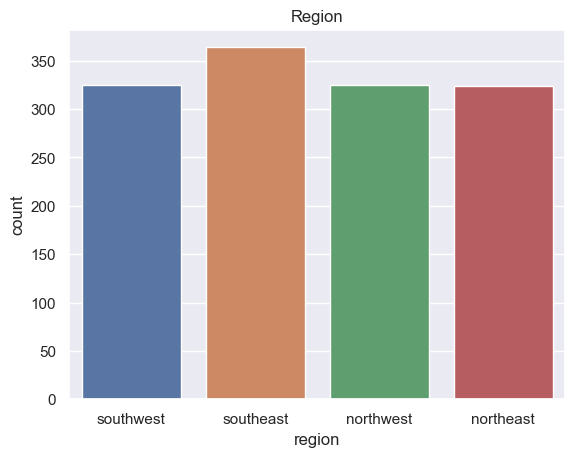

In [28]:
# region
print(insurance_data.region.value_counts())
sns.countplot(x=insurance_data.region, data=insurance_data)
plt.title('Region')
plt.show()

C:\Users\user.LAPTOP\AppData\Local\Temp\ipykernel_4752\2626893631.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance_data.charges)


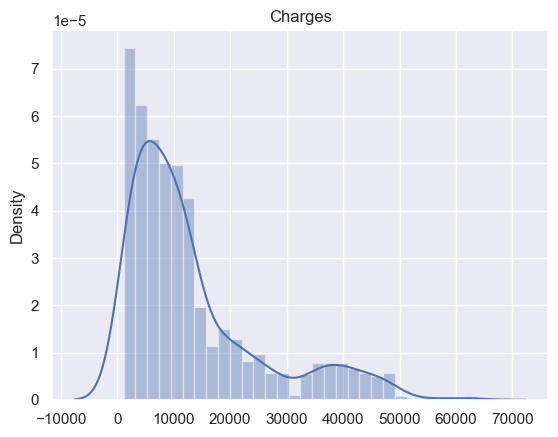

In [29]:
# check the distributionof charges columns
sns.distplot(x=insurance_data.charges)
plt.title('Charges')
plt.show()

## Data Pre - Process

## Encoding the categorical values

### 1. sex
### 2. smoker
### 3. region

In [32]:
insurance_data.head()
print(insurance_data.sex.value_counts())
print(insurance_data.smoker.value_counts())
print(insurance_data.region.value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [33]:
# encode the sex columns
insurance_data.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encode the smoker columns
insurance_data.replace({'smoker':{'no':0,'yes':1}}, inplace=True)

# encode the region columns
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}}, inplace=True)

In [34]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


# Seprate the data into features and target

In [35]:
X = insurance_data.drop(columns='charges',axis=1)
Y = insurance_data['charges']

In [36]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]


In [37]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Split the data into train & test

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

In [43]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(1338, 6) (1204, 6) (134, 6)
(1338,) (1204,) (134,)


# Model Trainig

## Linear Regression

In [44]:
linear = LinearRegression()

In [45]:
linear.fit(X_train,Y_train)

LinearRegression()

## Evalute the model

In [46]:
# prediction on traing data
training_data_pred = linear.predict(X_train)

In [47]:
# Check R Squared ERROR
score = metrics.r2_score(training_data_pred,Y_train)
print('R Squared ERROR  ', score)

R Squared ERROR   0.6734835372160313


In [48]:
# prediction on test data
test_data_pred = linear.predict(X_test)

In [49]:
# Check R Squared ERROR
score_1 = metrics.r2_score(test_data_pred,Y_test)
print('R Squared ERROR  ', score_1)

R Squared ERROR   0.6102225141303159


In [50]:
# Accuracy on train data
linear.score(X_train,Y_train)

0.7538541948445128

In [52]:
# Accuracy on test data
linear.score(X_test,Y_test)

0.7058997983752826

## Building predictive System

In [57]:
input_user = (28,0,33,3,0,0)

# input_user_numpy_asarray 

input_user_numpy_asarr = np.asarray(input_user)

# reshapped the numpy array
reshape_data = input_user_numpy_asarr.reshape(1,-1)

prediction = linear.predict(reshape_data)
print(prediction[0])

6621.6027658948115


C:\Users\user.LAPTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
